In [26]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np
from scipy.stats import boxcox
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
# Load the suburb_info.xlsx data
data = pd.read_excel('suburb_info.xlsx')

# Display the first few rows of the data to inspect
print(data.head())
print(data.info())

# Clean the data (remove percentage signs and commas from 'aus_born_perc', 'median_income', and 'median_house_price')
data['aus_born_perc'] = data['aus_born_perc'].str.rstrip('%').astype(float)
data['median_income'] = data['median_income'].str.replace(',', '').str.replace('$', '').astype(float)
data['median_house_price'] = data['median_house_price'].str.replace(',', '').str.replace('$', '').astype(float)

print(data.head())

       suburb  number_of_houses  number_of_units   municipality aus_born_perc  \
0  ABBOTSFORD              2304             4706          Yarra           68%   
1  ABERFELDIE              1410              453  Moonee Valley           81%   
2   ALBANVALE              1897              138       Brimbank           46%   
3      ALBION              1389             1392       Brimbank           52%   
4  ALPHINGTON              1729             1099        Darebin           73%   

  median_income median_house_price  population  
0        $1,797         $1,299,400        4025  
1        $1,571         $1,926,600       22442  
2          $907           $594,200       54005  
3          $929           $739,100       30677  
4        $1,538         $1,729,600        9227  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   suburb        

This code is loading an Excel file (suburb_info.xlsx) that contains suburb information and then performing data cleaning to prepare the data for further analysis. Specifically, it removes unnecessary characters (like percentage signs and dollar signs) and converts the data into numeric types to ensure that the columns aus_born_perc, median_income, and median_house_price are in a usable format for analysis. Afterward, it checks the data types and displays the cleaned data to verify the changes. This is a typical preprocessing step before applying statistical models or conducting further analysis.

In [28]:
# List of columns to be normalized/transformed
columns_to_transform = ['number_of_houses', 'number_of_units', 'population', 'aus_born_perc', 'median_income', 'median_house_price']

# Step 2.1: Standardization (Z-score normalization)
scaler = StandardScaler()
standardized_data = pd.DataFrame(scaler.fit_transform(data[columns_to_transform]), columns=columns_to_transform)
print("Standardized Data:")
print(standardized_data.head())

# Calculate correlation for standardized data
standardized_correlation = standardized_data.corr()['median_house_price'].sort_values(ascending=False)
print("\nCorrelation of features with 'median_house_price' (Standardized Data):")
print(standardized_correlation)

# Step 2.2: Min-Max Normalization
min_max_scaler = MinMaxScaler()
min_max_scaled_data = pd.DataFrame(min_max_scaler.fit_transform(data[columns_to_transform]), columns=columns_to_transform)
print("\nMin-Max Scaled Data:")
print(min_max_scaled_data.head())

# Calculate correlation for min-max scaled data
min_max_correlation = min_max_scaled_data.corr()['median_house_price'].sort_values(ascending=False)
print("\nCorrelation of features with 'median_house_price' (Min-Max Scaled Data):")
print(min_max_correlation)

# Step 2.3: Log Transformation (applying only to columns where all values are positive)
log_transformed_data = data[columns_to_transform].apply(lambda x: np.log1p(x) if np.all(x > 0) else x)
print("\nLog Transformed Data:")
print(log_transformed_data.head())

# Calculate correlation for log transformed data
log_correlation = log_transformed_data.corr()['median_house_price'].sort_values(ascending=False)
print("\nCorrelation of features with 'median_house_price' (Log Transformed Data):")
print(log_correlation)

# Step 2.4: Box-Cox Transformation (can only be applied to positive data)
boxcox_transformed_data = data[columns_to_transform].apply(lambda x: boxcox(x)[0] if np.all(x > 0) else x)
print("\nBox-Cox Transformed Data:")
print(boxcox_transformed_data.head())

# Calculate correlation for box-cox transformed data
boxcox_correlation = boxcox_transformed_data.corr()['median_house_price'].sort_values(ascending=False)
print("\nCorrelation of features with 'median_house_price' (Box-Cox Transformed Data):")
print(boxcox_correlation)


Standardized Data:
   number_of_houses  number_of_units  population  aus_born_perc  \
0         -0.545852         0.712207   -1.527529      -0.034127   
1         -0.809379        -0.648788    0.394837       1.176908   
2         -0.665824        -0.749590    3.689381      -2.083570   
3         -0.815569        -0.348300    1.254406      -1.524631   
4         -0.715346        -0.442063   -0.984544       0.431656   

   median_income  median_house_price  
0       1.290206            0.171267  
1       0.577392            1.504284  
2      -1.516891           -1.327527  
3      -1.447502           -1.019564  
4       0.473309            1.085591  

Correlation of features with 'median_house_price' (Standardized Data):
median_house_price    1.000000
median_income         0.719384
number_of_units       0.343858
aus_born_perc         0.303860
number_of_houses     -0.104490
population           -0.287242
Name: median_house_price, dtype: float64

Min-Max Scaled Data:
   number_of_houses  nu

Correlation of variables with median_house_price:
median_house_price    1.000000
median_income         0.719384
number_of_units       0.343858
aus_born_perc         0.303860
number_of_houses     -0.104490
population           -0.287242
Name: median_house_price, dtype: float64


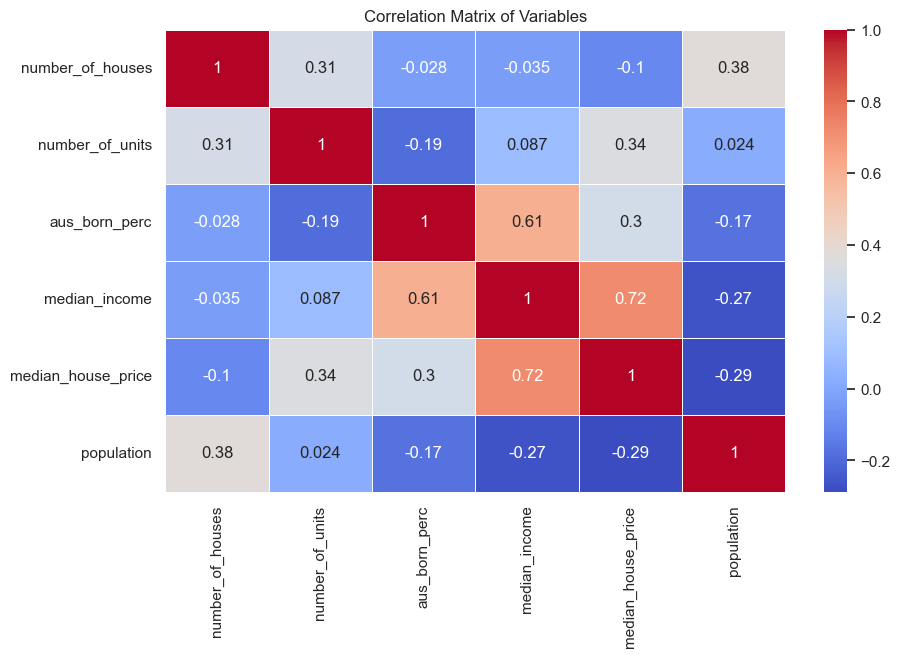

In [29]:
# Load the dataset
data = pd.read_excel('suburb_info.xlsx')

# Remove any unwanted characters from numeric columns (like '$', commas, or '%')
data['median_house_price'] = data['median_house_price'].replace('[\$,]', '', regex=True).astype(float)
data['median_income'] = data['median_income'].replace('[\$,]', '', regex=True).astype(float)
data['aus_born_perc'] = data['aus_born_perc'].replace('%', '', regex=True).astype(float) / 100
data['number_of_houses'] = pd.to_numeric(data['number_of_houses'], errors='coerce')
data['number_of_units'] = pd.to_numeric(data['number_of_units'], errors='coerce')
data['population'] = pd.to_numeric(data['population'], errors='coerce')

# Exclude non-numeric columns (e.g., 'suburb' and 'municipality')
numeric_data = data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Extract the correlation of median_house_price with other variables
correlation_with_target = correlation_matrix['median_house_price'].sort_values(ascending=False)

# Print the correlations with target
print("Correlation of variables with median_house_price:")
print(correlation_with_target)

# Visualize the correlation of median_house_price with other variables
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Variables")
plt.show()


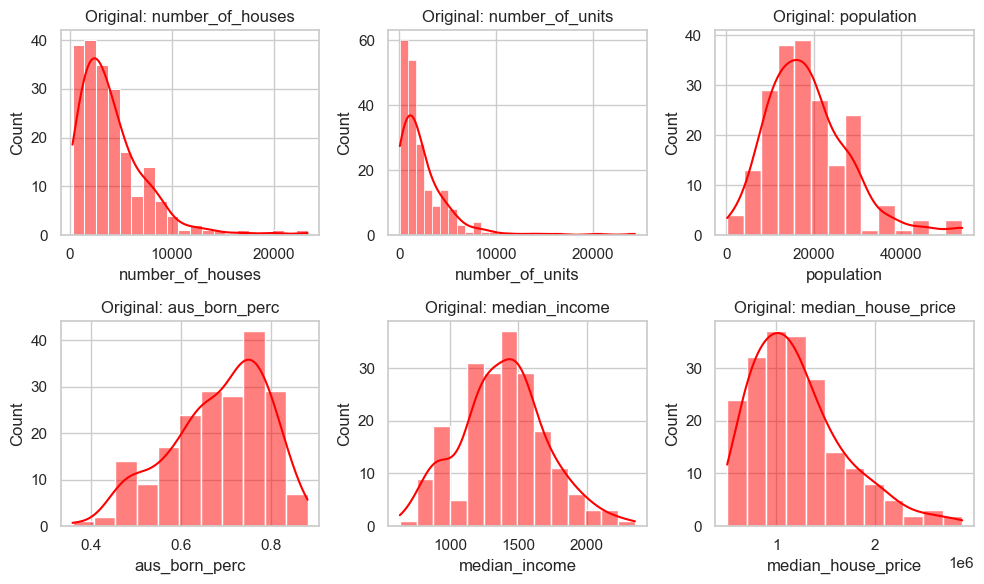

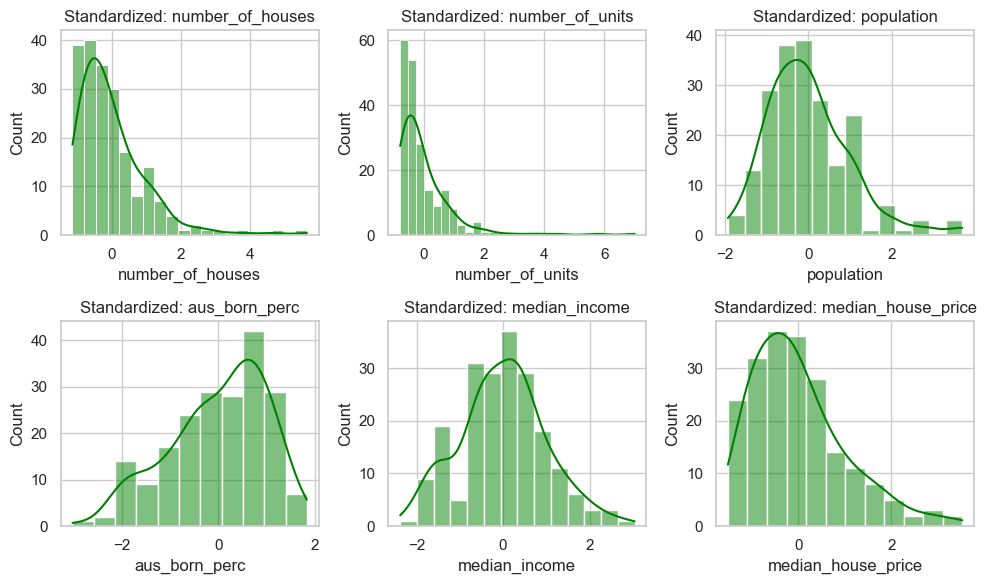

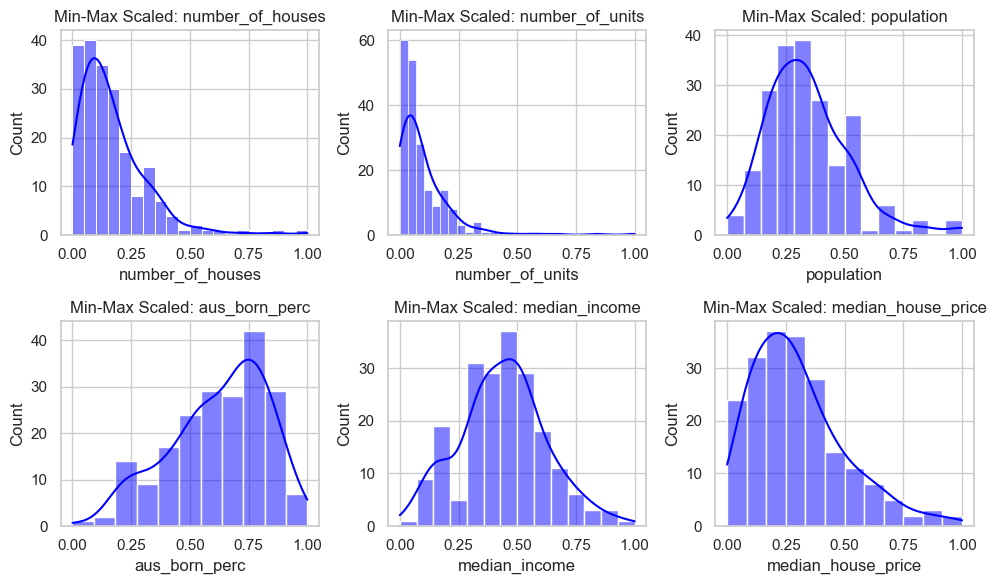

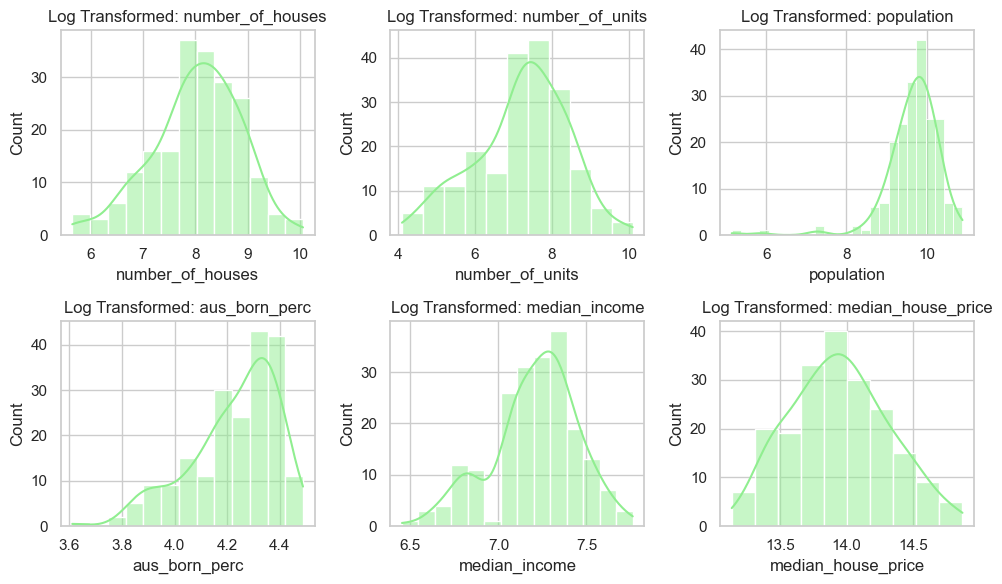

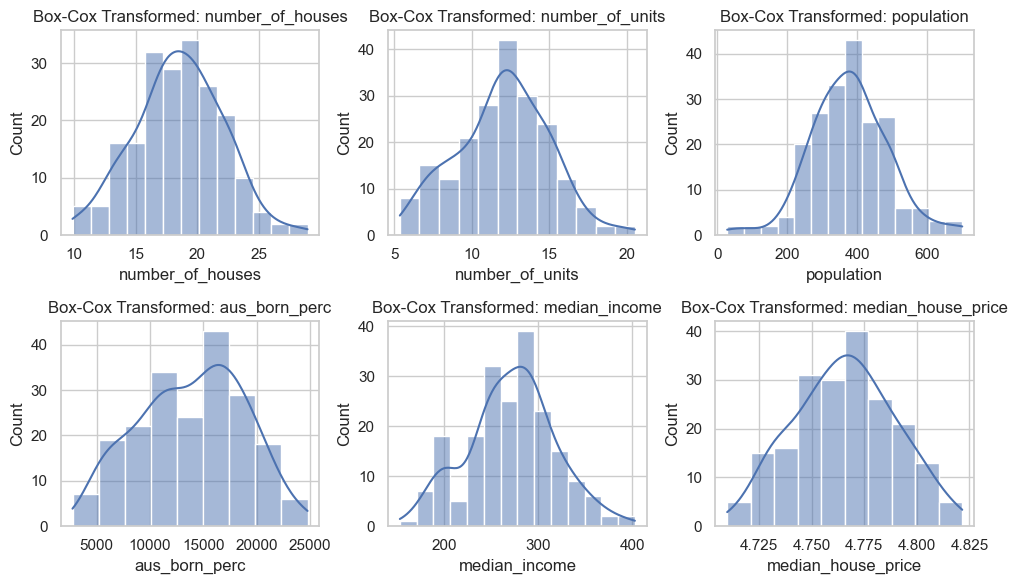

In [30]:
# Visualizing the distribution of data before and after transformations

# Original data distribution
plt.figure(figsize=(10, 6))
for i, col in enumerate(columns_to_transform, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[col], kde=True, color='red')
    plt.title(f'Original: {col}')
plt.tight_layout()
plt.show()

# Standardized data distribution
plt.figure(figsize=(10, 6))
for i, col in enumerate(columns_to_transform, 1):
    plt.subplot(2, 3, i)
    sns.histplot(standardized_data[col], kde=True, color='green')
    plt.title(f'Standardized: {col}')
plt.tight_layout()
plt.show()

# Min-Max Scaled data distribution
plt.figure(figsize=(10, 6))
for i, col in enumerate(columns_to_transform, 1):
    plt.subplot(2, 3, i)
    sns.histplot(min_max_scaled_data[col], kde=True, color='blue')
    plt.title(f'Min-Max Scaled: {col}')
plt.tight_layout()
plt.show()

# Log Transformed data distribution
plt.figure(figsize=(10, 6))
for i, col in enumerate(columns_to_transform, 1):
    plt.subplot(2, 3, i)
    sns.histplot(log_transformed_data[col], kde=True, color='lightgreen')
    plt.title(f'Log Transformed: {col}')
plt.tight_layout()
plt.show()

# Box-Cox Transformed data distribution
plt.figure(figsize=(10, 6))
for i, col in enumerate(columns_to_transform, 1):
    plt.subplot(2, 3, i)
    sns.histplot(boxcox_transformed_data[col], kde=True)
    plt.title(f'Box-Cox Transformed: {col}')
plt.tight_layout()
plt.show()

#### Comparison of Correlation Results and Skewness Analysis

##### Correlation Analysis:
When analyzing the correlations between features and the target variable median_house_price after applying various transformations, we observed the following patterns:

1. Standardization (Z-score Normalization): The correlation values between features and median_house_price remained largely unchanged compared to the original data. For instance, median_income continued to show a strong positive correlation with median_house_price (0.719), while other features like number_of_units and aus_born_perc showed moderate correlations.
The weak or negative correlations of features such as number_of_houses and population also persisted after standardization.
Conclusion: Standardization did not significantly impact the relationships between the features and the target. However, it may still be important for model training, especially for algorithms that are sensitive to feature scaling, such as linear regression, SVMs, or neural networks.

2. Min-Max Normalization: Similar to standardization, Min-Max normalization preserved the correlations, with only minimal changes. Median_income maintained the highest correlation with median_house_price (0.719), while the rest of the features showed no major shifts in correlation strength.
Conclusion: Although the correlations were not notably affected, Min-Max normalization can still be useful for machine learning models that are sensitive to feature ranges, such as neural networks and KNN.

3. Log Transformation: Log transformation slightly improved the correlations of certain features with median_house_price. For instance, aus_born_perc and number_of_units showed higher positive correlations with the target variable. Median_income remained the strongest predictor (0.703).
Conclusion: Log transformation can help normalize skewed distributions, which can improve model performance. While it did not dramatically alter the correlations, it effectively reduced skewness, which may lead to better model interpretation and performance for skewed data.

4. Box-Cox Transformation: The Box-Cox transformation had a modest effect on the correlations, similar to other transformations. Median_income continued to have a strong positive correlation with median_house_price (0.715), while other features displayed stable relationships.
Conclusion: Although Box-Cox did not significantly change correlations, it is highly effective at normalizing skewed data, which can be crucial for models that require normally distributed inputs.

##### Skewness Analysis:
The skewness in the original dataset indicated significant right-skewed distributions for several features, such as number_of_houses, number_of_units, and population. This skewness can negatively impact model accuracy, particularly for models that assume normality in the data (e.g., linear regression, decision trees).

1. Standardization and Min-Max Normalization: Neither of these techniques directly addressed the skewness in the data. Although the features were scaled to common ranges, the skewness persisted, particularly for features such as number_of_houses and population.
Conclusion: These methods are more suited for addressing scaling issues rather than skewness. They are important for algorithms that require scaled features but do not rely on the distribution being normal.

2. Log Transformation: Log transformation was particularly effective in reducing the skewness of highly skewed features like number_of_houses, number_of_units, and population. By applying the log transformation, these features exhibited more symmetric distributions, which can improve the interpretability of models that are sensitive to skewed data.
Conclusion: Log transformation is valuable when handling skewed data, as it improves normality and can enhance the performance of models that assume normally distributed features.

3. Box-Cox Transformation: The Box-Cox transformation successfully reduced skewness across all features, leading to distributions that were much closer to normal. Features like number_of_houses and population saw significant improvements in their distribution shape, which is ideal for predictive models that rely on normally distributed data.
Conclusion: Box-Cox is highly effective for correcting skewness and normalizing data. It is particularly useful for models that perform better when the input features follow a normal distribution.

##### Is Transformation or Normalization Necessary?
When considering both the correlation results and the skewness analysis, it becomes evident that the necessity for scaling or transformation depends on the specific modeling requirements.

1. Standardization and Min-Max Normalization: These methods are essential for machine learning algorithms that are sensitive to feature scaling (e.g., SVMs, neural networks). However, they do not resolve skewness issues, making them insufficient for improving data normality. While they had little impact on correlation, they ensure that all features are on a similar scale, which is crucial for some models.

2. Log Transformation: Log transformation proved useful for reducing skewness, especially in features with significant right skewness like number_of_houses and population. Although the correlation values did not change dramatically, the transformation improved the normality of the data, making it easier for models that assume normality to perform well. Log transformation is recommended for features with high skewness.

3. Box-Cox Transformation: The Box-Cox transformation was the most effective in correcting skewness, resulting in almost normal distributions for most features. Even though the correlations remained relatively stable, Box-Cox is highly recommended when skewness is a concern and normality is essential for the model.

##### In comparing the Box-Cox transformation and the Log transformation, the Box-Cox method proves superior, particularly for certain types of data, and the following points explain why Box-Cox is better than Log:

1. Flexibility of Transformation:
Box-Cox is a family of power transformations and is flexible because it includes a wide range of transformation options. It can handle negative, zero, and positive values (with some adjustments). It finds the best lambda value that maximizes the normality of the data.
Log Transformation, on the other hand, is limited in that it can only handle positive values. It specifically applies to data with large right-skewed distributions, and it may not always yield the best normalization for every dataset.

2. Normalization Effect:
Box-Cox is especially effective when the goal is to make data more normal, which helps in applying techniques that assume normality, like regression or hypothesis testing. In current case, after Box-Cox transformation, we can observe that the distribution of the variables becomes much more symmetrical (closer to a normal distribution), especially for variables like median_income and aus_born_perc, as evidenced by the histograms in the second image.
Log Transformation tends to reduce skewness, but it cannot always normalize the data completely. In some cases, like in population, the log transformation still leaves some skewness, making Box-Cox better suited for this.

3. Handling Skewness:
Box-Cox has proven to be particularly useful for transforming both positively and negatively skewed data into a more normal-like shape. This is evident in the smoother and more symmetrical shapes in the Box-Cox-transformed plots (e.g., median_income, number_of_units).
Log Transformation, while effective at reducing skewness for highly right-skewed data, may not perform as well for data that is less skewed or where the skew is not extreme. For instance, in the Log-transformed plots, population and aus_born_perc still retain visible skewness.

4. Optimization with Lambda:
Box-Cox chooses the optimal transformation parameter (lambda) from a range that maximizes the likelihood of the transformed data fitting a normal distribution. This automated choice of the best transformation makes it more versatile compared to Log, which applies a fixed transformation formula without optimization.
The Log Transformation is essentially a specific case of Box-Cox with lambda = 0, but it doesn’t allow for further tuning.

5. Effectiveness Across Multiple Variables:
Box-Cox works better across different types of variables, as demonstrated in this case. It worked effectively for variables like median_income, number_of_units, and aus_born_perc, yielding well-behaved distributions that are closer to normal, while Log transformation still leaves some variables skewed.
In contrast, the Log Transformation is more limited in its application and often works best only when the data is already strongly skewed to the right.

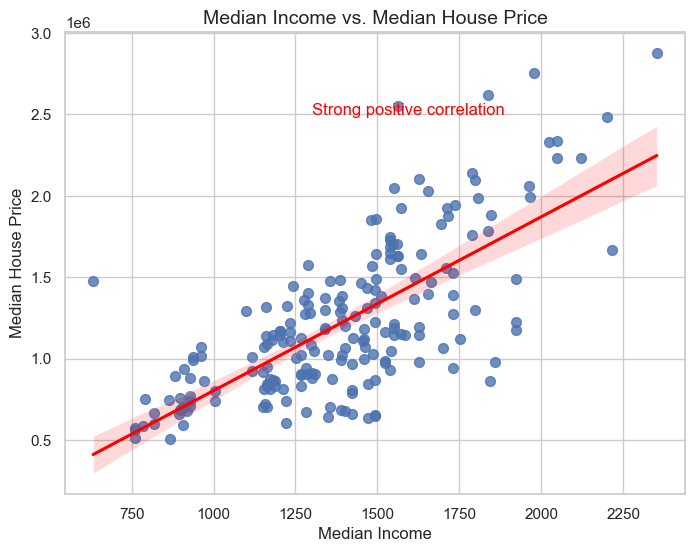

In [31]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(8, 6))

# Plotting Median Income vs. Median House Price with regression line
sns.regplot(x='median_income', y='median_house_price', data=data, scatter_kws={'s': 50}, line_kws={'color': 'red'})

# Adding labels and title
plt.xlabel("Median Income", fontsize=12)
plt.ylabel("Median House Price", fontsize=12)
plt.title("Median Income vs. Median House Price", fontsize=14)

# Annotation for the strong positive correlation
plt.text(1300, 2.5e6, "Strong positive correlation", fontsize=12, color='red')

# Show the plot
plt.show()


##### Insights from the Graph:

This graph illustrates the relationship between median income and median house prices across various suburbs. The scatter points represent individual suburbs, while the red regression line captures the overall trend between these two variables. Several key insights emerge from the graph:

1. Strong Positive Correlation: The clear upward slope of the red regression line indicates a strong positive correlation between median income and median house prices. This suggests that suburbs with higher median incomes tend to have significantly higher house prices. The relationship is direct—wealthier areas typically feature more expensive housing markets.

2. Income as a Key Driver of Property Prices: The strong linear trend suggests that income levels are one of the major determinants of house prices in Melbourne suburbs. This aligns with economic principles, where higher purchasing power leads to greater demand for housing, pushing prices upwards in affluent areas.

3. Uniform Trend Across Suburbs: The spread of the data points around the regression line is relatively consistent, suggesting that this correlation between income and house prices applies uniformly across different suburbs, with minimal variation from the trend.

4. Potential for Predictive Modeling: The strength of the linear relationship indicates that median income could be a robust predictor for estimating median house prices in future modeling tasks. Using income as a feature in a regression model could yield strong predictive performance for housing market analyses.

5. Policy and Urban Planning Implications: The correlation provides insights that may inform urban planning and policy decisions. Areas with lower median incomes may require more affordable housing initiatives to balance the housing market and improve accessibility for lower-income households.

<div class="alert alert-block alert-success"> 

#### REFERENCES

1. SciPy. (n.d.). scipy.stats.boxcox. SciPy. https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox.html

2. Codecademy. (n.d.). Data transformations for multiple linear regression. Codecademy. https://www.codecademy.com/article/data-transformations-for-multiple-linear-regression

3. scikit-learn developers. (n.d.). sklearn.preprocessing.StandardScaler. scikit-learn. https://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.StandardScaler.html

4. scikit-learn developers. (n.d.). sklearn.preprocessing.MinMaxScaler. scikit-learn. https://scikit-learn.org/1.5/modules/generated/sklearn.preprocessing.MinMaxScaler.html

<div class="alert alert-block alert-success"> 

### ACKNOWLEDGEMENT

* We acknowledge the assistance of ChatGPT, powered by OpenAI, in completing certain parts of this assignment. The use of this AI tool provided valuable support enhancing the overall quality of the work. 
OpenAI. (2023). ChatGPT (GPT-4). https://openai.com/chatgpt